# Overview

## Main Purpose

1. Identify the factors that affect freshmen's retention rate.
2. Build a model to predict if a student will come back to school. 

## About Data

1. Freshmen data from University of St.Thomas for 5 years (2009 to 2013).
2. Consisted of Personal information (gender, year, ...) and academic information (GPA, scores, ...). 
3. Imbalanced data (target variable is skewed).

## Steps


1. Drop variables based on logical approach.    
    - missing values
    - outlier
    - correlation

2. Undersampling - handling imbalanced data

3. Feature selection
    - chi square for feature selection? 
     - if there is no relationship between selected feature and the dependent varialbe, then drop it? --> Yes
     - why would you do chi-square? --> avoid massive extension due to onehotencoding.
     
    - Continue with backward method 

4. Logistic regression.

5. Evaluating performance using confuison matrix.



In [65]:
# load libraries
import pandas as pd
import numpy as np

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt

# Mathematics/Statistics
from scipy.stats import chi2_contingency


## About  my data
### information and description

In [66]:
#loading data 
df = pd.read_excel("Retention_Data.xlsx")

In [67]:
df

,Number,Cohort_Year,Gender,1st_Generation_Student?,IPEDS_Ethnicity,IPEDS_Ethnicity_Desc,Citizenship_Type,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,ACTM_SCORE,ACTE_SCORE,ACTR_SCORE,ACTS_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_1_STEM?,Fall_2?
0,1,Fall 2009,F,N,13,White,Y,Resident,16,3.72,25,29,21,27,24,0.0,0,N,0,1
1,2,Fall 2009,F,N,13,White,Y,Resident,12,3.67,25,26,26,23,24,9.0,4,N,0,1
2,3,Fall 2009,M,Y,13,White,Y,Resident,13,3.99,27,28,25,29,27,20.0,20,N,1,1
3,4,Fall 2009,F,N,10,Asian,Y,Resident,16,3.84,29,27,31,30,26,2.7,0,N,0,1
4,5,Fall 2009,M,N,13,White,Y,Resident,13,3.39,28,26,24,31,29,8.0,8,N,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,6752,Fall 2013,F,N,13,White,Y,Resident,17,3.86,32,32,26,36,35,40.0,0,N,1,0
6752,6753,Fall 2013,M,N,13,White,Y,Resident,16,3.16,21,22,22,21,19,0.0,0,N,0,0
6753,6754,Fall 2013,F,N,13,White,Y,Resident,16,3.92,27,27,28,27,25,5.0,0,N,1,1
6754,6755,Fall 2013,M,N,13,White,Y,Resident,16,3.52,21,21,18,21,22,0.0,0,N,0,1


In [68]:
# overview of my data
# any missing values? anything particularly interesting?
df.info()

# HS_GPA has missing values (20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   6756 non-null   int64  
 1   Cohort_Year              6756 non-null   object 
 2   Gender                   6756 non-null   object 
 3   1st_Generation_Student?  6756 non-null   object 
 4   IPEDS_Ethnicity          6756 non-null   int64  
 5   IPEDS_Ethnicity_Desc     6756 non-null   object 
 6   Citizenship_Type         6756 non-null   object 
 7   Resident                 6756 non-null   object 
 8   Fall_1_Credits           6756 non-null   int64  
 9   HS_GPA                   6736 non-null   float64
 10  ACTC_SCORE               6756 non-null   int64  
 11  ACTM_SCORE               6756 non-null   int64  
 12  ACTE_SCORE               6756 non-null   int64  
 13  ACTR_SCORE               6756 non-null   int64  
 14  ACTS_SCORE              

In [69]:
df.describe()

,Number,IPEDS_Ethnicity,Fall_1_Credits,HS_GPA,ACTC_SCORE,ACTM_SCORE,ACTE_SCORE,ACTR_SCORE,ACTS_SCORE,Transfer_Credits,AP_Credits,Fall_1_STEM?,Fall_2?
count,6756.000000,6756.000000,6756.000000,6736.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000
mean,3378.500000,12.609532,15.703375,3.546614,25.565867,25.364713,25.358052,25.917999,24.964180,8.253982,3.010361,0.263025,0.875222
std,1950.433542,1.366510,1.425659,0.384303,3.351937,3.884440,4.350704,4.690835,3.558568,11.149682,5.749177,0.440309,0.330491
min,1.000000,1.000000,12.000000,2.070000,16.000000,14.000000,10.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1689.750000,13.000000,16.000000,3.280000,23.000000,23.000000,22.000000,22.000000,23.000000,0.000000,0.000000,0.000000,1.000000
50%,3378.500000,13.000000,16.000000,3.580000,25.000000,25.000000,25.000000,26.000000,25.000000,4.000000,0.000000,0.000000,1.000000
75%,5067.250000,13.000000,16.000000,3.860000,28.000000,28.000000,28.000000,30.000000,27.000000,12.000000,4.000000,1.000000,1.000000
max,6756.000000,14.000000,21.000000,5.220000,36.000000,36.000000,36.000000,36.000000,36.000000,85.000000,40.000000,1.000000,1.000000


### About my data - imbalanced data 

(array([0, 1]), [Text(0, 0, 'Returned'), Text(1, 0, 'Not returned')])

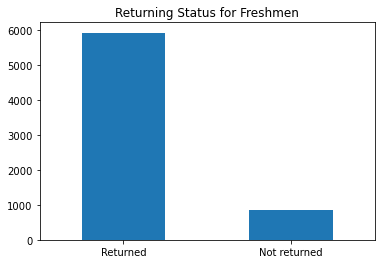

In [70]:
# Checking distribution of target variable
# it is highly skewed: imbalanced data

target = df['Fall_2?'].value_counts()
target = target.rename({1:'Returned',0:'Not returned'})
target.plot(kind = "bar", title = "Returning Status for Freshmen")
plt.xticks(rotation = 0) # Keeping the x-axis labels horizontal


### Why wouldn't I perform undersampling here? 

I was concerned about 'Cohort_Year'.
If Cohort_Year remains selected after feature selection, I may need to perform stratified sampling from each year. 
Otherwise, I could just get a sample from the entire pool. 

So, I wait until the feature selection! 

## Dropping less important variables
- Correlation check
- Outlier check
- Missing value check


**HS_GPA** has missing values. 

**Individual ACT Scores** have been dropped due to high correlation. 

**No outliers** 

### Missing Values
Only 20 missing values from one variable. 
20 out of 6700 is not a big deal. 

I could have dropped them, but would rather keep them in case. 

I am going to fill up with **median**. 

*knn* and *regression* can be used instead, but not convinced if it's worth it. -- less compensation

Why *not* mean? 

The distribution of HS_GPA is **skewed** (left). 

Mean would have been a good option if it was normally distributed. 

Just like the simple example of salaires -- I used median to fill out the missing values. 

/Users/taiwookim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HS_GPA', ylabel='Density'>

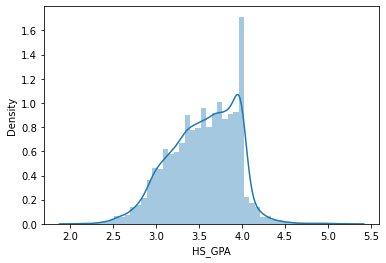

In [71]:
# checking distribution of HS_GPA to decide how I would fill up the missing values.
sns.distplot(df['HS_GPA'])

In [72]:
# Handling missing values first
df.isna()
df.isna().sum()

Number                      0
Cohort_Year                 0
Gender                      0
1st_Generation_Student?     0
IPEDS_Ethnicity             0
IPEDS_Ethnicity_Desc        0
Citizenship_Type            0
Resident                    0
Fall_1_Credits              0
HS_GPA                     20
ACTC_SCORE                  0
ACTM_SCORE                  0
ACTE_SCORE                  0
ACTR_SCORE                  0
ACTS_SCORE                  0
Transfer_Credits            0
AP_Credits                  0
Pell                        0
Fall_1_STEM?                0
Fall_2?                     0
dtype: int64

In [73]:
# fill up the missing values with median value. 

df.fillna(round(df['HS_GPA'].median()), inplace = True)
df.isna().sum()

Number                     0
Cohort_Year                0
Gender                     0
1st_Generation_Student?    0
IPEDS_Ethnicity            0
IPEDS_Ethnicity_Desc       0
Citizenship_Type           0
Resident                   0
Fall_1_Credits             0
HS_GPA                     0
ACTC_SCORE                 0
ACTM_SCORE                 0
ACTE_SCORE                 0
ACTR_SCORE                 0
ACTS_SCORE                 0
Transfer_Credits           0
AP_Credits                 0
Pell                       0
Fall_1_STEM?               0
Fall_2?                    0
dtype: int64

### Correlation

I think this is actually the perfect situation. 

The avareage score consists of Math, English, Reading and Science. 

And, each subject appears to be independent to each other (not perfectly, but fairly low correlation). 

(also interest to see that students with Math score tend to have higher scores in Science!)

I conclude that the average score well defines the combination of all other scores. 

So I would **drop** each subject and **keep** Average score only. 



<AxesSubplot:>

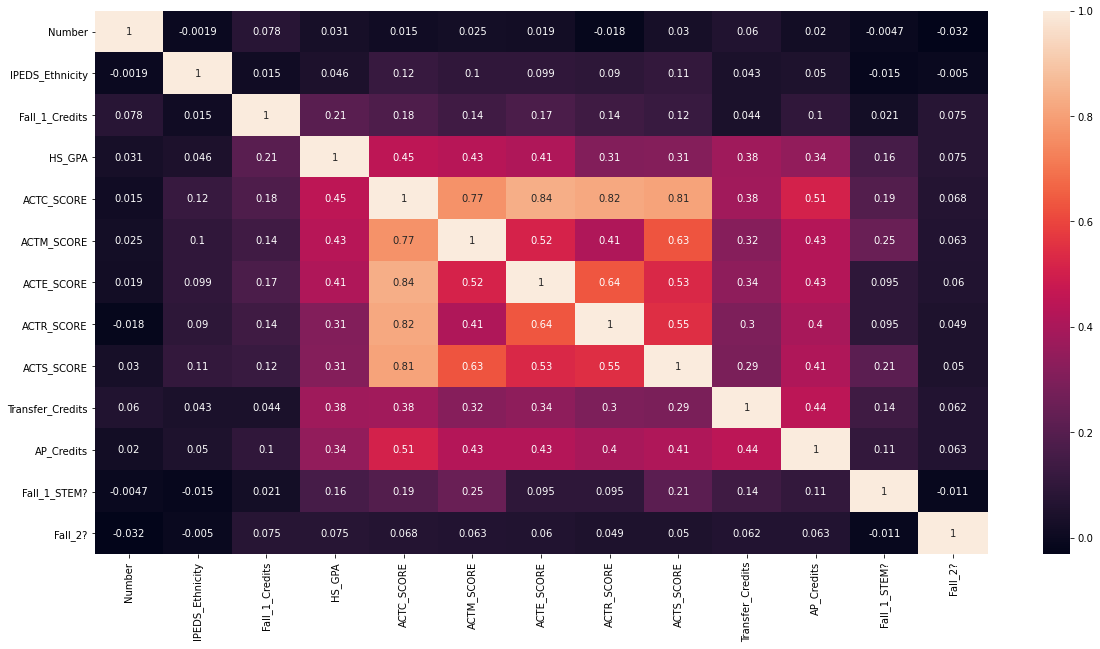

In [74]:
# checking correlation plot
# ACT Scores are correlated to each other. -- especially with ACTC (ACT Composite Score -- a.k.a. Average score)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

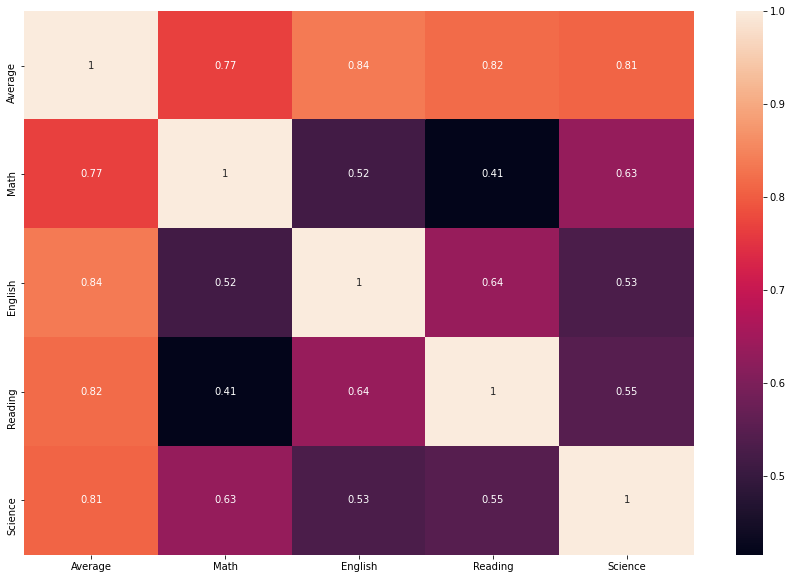

In [75]:
# Let's take a closer look at the ACT Scores.

ACT_Scores = df.iloc[:,10:-5]
ACT_Scores.columns = ["Average","Math","English","Reading","Science"]

plt.figure(figsize=(15,10))
ACTheatmap = sns.heatmap(ACT_Scores.corr(), annot = True)

# ACTheatmap.set_yticklabels(ACTheatmap.get_yticklabels(), rotation=0)

In [76]:
df = df.drop(columns = ["ACTM_SCORE","ACTE_SCORE","ACTR_SCORE","ACTS_SCORE"])
df

,Number,Cohort_Year,Gender,1st_Generation_Student?,IPEDS_Ethnicity,IPEDS_Ethnicity_Desc,Citizenship_Type,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_1_STEM?,Fall_2?
0,1,Fall 2009,F,N,13,White,Y,Resident,16,3.72,25,0.0,0,N,0,1
1,2,Fall 2009,F,N,13,White,Y,Resident,12,3.67,25,9.0,4,N,0,1
2,3,Fall 2009,M,Y,13,White,Y,Resident,13,3.99,27,20.0,20,N,1,1
3,4,Fall 2009,F,N,10,Asian,Y,Resident,16,3.84,29,2.7,0,N,0,1
4,5,Fall 2009,M,N,13,White,Y,Resident,13,3.39,28,8.0,8,N,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,6752,Fall 2013,F,N,13,White,Y,Resident,17,3.86,32,40.0,0,N,1,0
6752,6753,Fall 2013,M,N,13,White,Y,Resident,16,3.16,21,0.0,0,N,0,0
6753,6754,Fall 2013,F,N,13,White,Y,Resident,16,3.92,27,5.0,0,N,1,1
6754,6755,Fall 2013,M,N,13,White,Y,Resident,16,3.52,21,0.0,0,N,0,1


### Other colunms to drop

**Number** column is dropped since it is just index

**IPEDS_Ethnicity** column is dropped since it is duplicate to IPEDS_Ethnicity_Desc

In [77]:
df = df.drop(columns = ['Number','IPEDS_Ethnicity'])
df

,Cohort_Year,Gender,1st_Generation_Student?,IPEDS_Ethnicity_Desc,Citizenship_Type,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_1_STEM?,Fall_2?
0,Fall 2009,F,N,White,Y,Resident,16,3.72,25,0.0,0,N,0,1
1,Fall 2009,F,N,White,Y,Resident,12,3.67,25,9.0,4,N,0,1
2,Fall 2009,M,Y,White,Y,Resident,13,3.99,27,20.0,20,N,1,1
3,Fall 2009,F,N,Asian,Y,Resident,16,3.84,29,2.7,0,N,0,1
4,Fall 2009,M,N,White,Y,Resident,13,3.39,28,8.0,8,N,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,Fall 2013,F,N,White,Y,Resident,17,3.86,32,40.0,0,N,1,0
6752,Fall 2013,M,N,White,Y,Resident,16,3.16,21,0.0,0,N,0,0
6753,Fall 2013,F,N,White,Y,Resident,16,3.92,27,5.0,0,N,1,1
6754,Fall 2013,M,N,White,Y,Resident,16,3.52,21,0.0,0,N,0,1


## Running Chi-Sq to drop unrelated variables

**Why** Chi-sq over other feature selection methods?

I would like to *avoid the massive extension in number of columns* due to the dummy variables.

Null: the column has no relationship with the dependent variable.
Alt: the column has relationship with the dependent variable. 

If it fails to reject the null, we say that the column has no relationship with the target variable (dependent varialbe)

Ideally, many categorical columns turn out to be having high p values so that I will fail to reject the Null (Drop the column)

In [78]:
# Columns with Categorical value and the number of unique values 
df['IPEDS_Ethnicity_Desc'].dtype
CategoricalColumn = {}
for i in df.columns:
    if df[i].dtype == 'O':
        CategoricalColumn[i] = df[i].nunique()
CategoricalColumn['Fall_1_STEM?'] = df["Fall_1_STEM?"].nunique()
print(CategoricalColumn)

{'Cohort_Year': 5, 'Gender': 2, '1st_Generation_Student?': 2, 'IPEDS_Ethnicity_Desc': 8, 'Citizenship_Type': 5, 'Resident': 2, 'Pell': 2, 'Fall_1_STEM?': 2}


In [79]:
# dropping the columns in which fail to reject the Null --> there is no relationship between the column and returning.

droppingColumns = []
for j in CategoricalColumn:
    contTable = pd.crosstab(df[j],df['Fall_2?'])
    if chi2_contingency(contTable)[1] > 0.05:
        droppingColumns.append(j)


df = df.drop(columns = droppingColumns)


In [80]:
df

,1st_Generation_Student?,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_2?
0,N,Resident,16,3.72,25,0.0,0,N,1
1,N,Resident,12,3.67,25,9.0,4,N,1
2,Y,Resident,13,3.99,27,20.0,20,N,1
3,N,Resident,16,3.84,29,2.7,0,N,1
4,N,Resident,13,3.39,28,8.0,8,N,1
...,...,...,...,...,...,...,...,...,...
6751,N,Resident,17,3.86,32,40.0,0,N,0
6752,N,Resident,16,3.16,21,0.0,0,N,0
6753,N,Resident,16,3.92,27,5.0,0,N,1
6754,N,Resident,16,3.52,21,0.0,0,N,1


## Undersampling

I have minimized the number of features through chi-sqaure. 

'Cohort_Year' has been dropped. 

I am going to use the entire sample for undersampling. 

If 'Cohort_Year' has **not** been dropped, I would have done stratified sampling to perform undersampling, just to make sure that samples are drawn equally from each year.

In [81]:
df_returned = df[df['Fall_2?'] == 1]
df_NotReturned = df[df['Fall_2?'] == 0]

In [82]:
# 5913 entries with 'returns'.
df_returned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6755
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   1st_Generation_Student?  5913 non-null   object 
 1   Resident                 5913 non-null   object 
 2   Fall_1_Credits           5913 non-null   int64  
 3   HS_GPA                   5913 non-null   float64
 4   ACTC_SCORE               5913 non-null   int64  
 5   Transfer_Credits         5913 non-null   float64
 6   AP_Credits               5913 non-null   int64  
 7   Pell                     5913 non-null   object 
 8   Fall_2?                  5913 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 462.0+ KB


In [83]:
# only 843 entires with 'not returns'
df_NotReturned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 16 to 6752
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   1st_Generation_Student?  843 non-null    object 
 1   Resident                 843 non-null    object 
 2   Fall_1_Credits           843 non-null    int64  
 3   HS_GPA                   843 non-null    float64
 4   ACTC_SCORE               843 non-null    int64  
 5   Transfer_Credits         843 non-null    float64
 6   AP_Credits               843 non-null    int64  
 7   Pell                     843 non-null    object 
 8   Fall_2?                  843 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 65.9+ KB


In [84]:
# Going to randomly pull 843 entires from 'return' data set.
# Setting random_state for reproducibility.

returns_underS = df_returned.sample(n=843, random_state=100)
returns_underS

,1st_Generation_Student?,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_2?
2680,Y,Off-Campus,12,2.86,20,0.0,0,Y,1
1657,N,Resident,16,3.90,23,3.0,0,N,1
1670,Y,Resident,16,3.87,26,12.0,0,N,1
4622,Y,Resident,16,3.59,29,0.0,0,N,1
4425,N,Resident,16,3.54,27,0.0,0,N,1
...,...,...,...,...,...,...,...,...,...
1394,N,Resident,16,4.00,30,17.0,8,N,1
2169,N,Resident,12,3.11,27,4.0,4,N,1
6684,N,Off-Campus,16,3.70,26,14.0,0,N,1
5157,N,Resident,17,3.37,25,0.0,0,N,1


In [85]:
# Concat the two dataframe, creating a new balanced dataframe.
df_underS = pd.concat([df_NotReturned, returns_underS])
df_underS

,1st_Generation_Student?,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_2?
16,N,Resident,12,2.75,19,0.0,0,N,0
22,Y,Resident,16,3.69,24,0.0,0,N,0
31,N,Resident,18,3.80,32,4.0,4,N,0
47,Y,Off-Campus,12,3.01,19,0.0,0,Y,0
52,N,Resident,16,3.10,22,0.0,0,N,0
...,...,...,...,...,...,...,...,...,...
1394,N,Resident,16,4.00,30,17.0,8,N,1
2169,N,Resident,12,3.11,27,4.0,4,N,1
6684,N,Off-Campus,16,3.70,26,14.0,0,N,1
5157,N,Resident,17,3.37,25,0.0,0,N,1


## Get dummies and split

In [86]:
# Three binary catagorical columns
df_underS = pd.get_dummies(df_underS, columns = ['1st_Generation_Student?','Resident','Pell'],drop_first = True)
df_underS

,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,Fall_2?,1st_Generation_Student?_Y,Resident_Resident,Pell_Y
16,12,2.75,19,0.0,0,0,0,1,0
22,16,3.69,24,0.0,0,0,1,1,0
31,18,3.80,32,4.0,4,0,0,1,0
47,12,3.01,19,0.0,0,0,1,0,1
52,16,3.10,22,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1394,16,4.00,30,17.0,8,1,0,1,0
2169,12,3.11,27,4.0,4,1,0,1,0
6684,16,3.70,26,14.0,0,1,0,0,0
5157,17,3.37,25,0.0,0,1,0,1,0


In [87]:
# Splitting dataframe into X and y for analysis

y = df_underS['Fall_2?'].values
X = df_underS.drop(columns = ['Fall_2?']).values
X,y

(array([[12.  ,  2.75, 19.  , ...,  0.  ,  1.  ,  0.  ],
        [16.  ,  3.69, 24.  , ...,  1.  ,  1.  ,  0.  ],
        [18.  ,  3.8 , 32.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [16.  ,  3.7 , 26.  , ...,  0.  ,  0.  ,  0.  ],
        [17.  ,  3.37, 25.  , ...,  0.  ,  1.  ,  0.  ],
        [16.  ,  2.79, 23.  , ...,  0.  ,  1.  ,  0.  ]]),
 array([0, 0, 0, ..., 1, 1, 1]))

## Ready to split into Train/Test

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [89]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Overview of the first run

P value for the F test is statistically significant (0.009). 

It means that at least one of the variables (columns) has relationship with the dependent variable (Fall_2?)

Let's eliminate one with the highest p value and repeat the same process untill we reach at the model with all coefficents being statistically significant.



In [90]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              2.554
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                     0.00919
Time:                        11:11:14   Log-Likelihood:                         -1432.3
No. Observations:                1348   AIC:                                      2881.
Df Residuals:                    1340   BIC:                                      2922.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0171      0.020      0.863      0.388      -0.022       0.056
x2             0.0246      0.022      1.099      0.272      -0.019       0.068
x3            -0.0084      0.024     -0.349      0.727      -0.055       0.039
x4             0.0248      0.023      1.097      0.273      -0.020       0.069
x5             0.0332      0.023      1.412      0.158      -0.013       0.079
x6            -0.0386      0.020     -1.959      0.050      -0.077    5.64e-05
x7             0.0348      0.020      1.781      0.075      -0.004       0.073
x8            -0.0030      0.020     -0.150      0.881      -0.042       0.036
==============================================================================
Omnibus:                     5326.799   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.803
Skew:                           0.009   Prob(JB):                     4.10e-44
Kurtosis:                       1.114   Cond. No.                         2.29
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# x8 : Pell_Y has been dropped and re-run the model 

# Splitting dataframe into X and y for analysis

X = df_underS.drop(columns = ['Fall_2?','Pell_Y']).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              2.917
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                     0.00495
Time:                        11:11:14   Log-Likelihood:                         -1432.4
No. Observations:                1348   AIC:                                      2879.
Df Residuals:                    1341   BIC:                                      2915.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0169      0.020      0.856      0.392      -0.022       0.056
x2             0.0246      0.022      1.100      0.271      -0.019       0.068
x3            -0.0079      0.024     -0.334      0.739      -0.055       0.039
x4             0.0245      0.022      1.089      0.276      -0.020       0.069
x5             0.0332      0.023      1.417      0.157      -0.013       0.079
x6            -0.0391      0.019     -2.014      0.044      -0.077      -0.001
x7             0.0352      0.019      1.821      0.069      -0.003       0.073
==============================================================================
Omnibus:                     5326.115   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.840
Skew:                           0.008   Prob(JB):                     4.03e-44
Kurtosis:                       1.114   Cond. No.                         2.28
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Checking the location of x's. 

df_underS.drop(columns = ['Fall_2?','Pell_Y'])

,Fall_1_Credits,HS_GPA,ACTC_SCORE,Transfer_Credits,AP_Credits,1st_Generation_Student?_Y,Resident_Resident
16,12,2.75,19,0.0,0,0,1
22,16,3.69,24,0.0,0,1,1
31,18,3.80,32,4.0,4,0,1
47,12,3.01,19,0.0,0,1,0
52,16,3.10,22,0.0,0,0,1
...,...,...,...,...,...,...,...
1394,16,4.00,30,17.0,8,0,1
2169,12,3.11,27,4.0,4,0,1
6684,16,3.70,26,14.0,0,0,0
5157,17,3.37,25,0.0,0,0,1


In [93]:
# x3 : ACTC_SCORE has been dropped and re-run the model 

# Splitting dataframe into X and y for analysis

X = df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE']).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              3.387
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                     0.00255
Time:                        11:11:14   Log-Likelihood:                         -1432.4
No. Observations:                1348   AIC:                                      2877.
Df Residuals:                    1342   BIC:                                      2908.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0163      0.020      0.830      0.407      -0.022       0.055
x2             0.0226      0.022      1.050      0.294      -0.020       0.065
x3             0.0237      0.022      1.060      0.290      -0.020       0.068
x4             0.0303      0.022      1.393      0.164      -0.012       0.073
x5            -0.0383      0.019     -1.988      0.047      -0.076      -0.000
x6             0.0350      0.019      1.810      0.071      -0.003       0.073
==============================================================================
Omnibus:                     5324.919   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.907
Skew:                           0.009   Prob(JB):                     3.90e-44
Kurtosis:                       1.114   Cond. No.                         1.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Checking the location of X's
df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE'])

,Fall_1_Credits,HS_GPA,Transfer_Credits,AP_Credits,1st_Generation_Student?_Y,Resident_Resident
16,12,2.75,0.0,0,0,1
22,16,3.69,0.0,0,1,1
31,18,3.80,4.0,4,0,1
47,12,3.01,0.0,0,1,0
52,16,3.10,0.0,0,0,1
...,...,...,...,...,...,...
1394,16,4.00,17.0,8,0,1
2169,12,3.11,4.0,4,0,1
6684,16,3.70,14.0,0,0,0
5157,17,3.37,0.0,0,0,1


In [95]:
# x1 : Fall_1_Credits has been dropped and re-run the model 

# Splitting dataframe into X and y for analysis

X = df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits']).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              3.928
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                     0.00154
Time:                        11:11:14   Log-Likelihood:                         -1432.8
No. Observations:                1348   AIC:                                      2876.
Df Residuals:                    1343   BIC:                                      2902.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0264      0.021      1.255      0.210      -0.015       0.068
x2             0.0222      0.022      0.998      0.318      -0.021       0.066
x3             0.0311      0.022      1.431      0.153      -0.012       0.074
x4            -0.0379      0.019     -1.969      0.049      -0.076      -0.000
x5             0.0358      0.019      1.858      0.063      -0.002       0.074
==============================================================================
Omnibus:                     5307.360   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.874
Skew:                           0.008   Prob(JB):                     2.40e-44
Kurtosis:                       1.109   Cond. No.                         1.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Checking the location of X's
df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits'])

,HS_GPA,Transfer_Credits,AP_Credits,1st_Generation_Student?_Y,Resident_Resident
16,2.75,0.0,0,0,1
22,3.69,0.0,0,1,1
31,3.80,4.0,4,0,1
47,3.01,0.0,0,1,0
52,3.10,0.0,0,0,1
...,...,...,...,...,...
1394,4.00,17.0,8,0,1
2169,3.11,4.0,4,0,1
6684,3.70,14.0,0,0,0
5157,3.37,0.0,0,0,1


In [97]:
# x2 : Transfer_Credits has been dropped and re-run the model 

# Splitting dataframe into X and y for analysis

X = df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits','Transfer_Credits']).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              4.661
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                    0.000972
Time:                        11:11:15   Log-Likelihood:                         -1433.3
No. Observations:                1348   AIC:                                      2875.
Df Residuals:                    1344   BIC:                                      2895.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0322      0.020      1.597      0.111      -0.007       0.072
x2             0.0393      0.020      1.952      0.051      -0.000       0.079
x3            -0.0364      0.019     -1.899      0.058      -0.074       0.001
x4             0.0353      0.019      1.828      0.068      -0.003       0.073
==============================================================================
Omnibus:                     5288.092   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.954
Skew:                           0.009   Prob(JB):                     1.40e-44
Kurtosis:                       1.104   Cond. No.                         1.42
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Checking the location of X's
df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits','Transfer_Credits'])

,HS_GPA,AP_Credits,1st_Generation_Student?_Y,Resident_Resident
16,2.75,0,0,1
22,3.69,0,1,1
31,3.80,4,0,1
47,3.01,0,1,0
52,3.10,0,0,1
...,...,...,...,...
1394,4.00,8,0,1
2169,3.11,4,0,1
6684,3.70,0,0,0
5157,3.37,0,0,1


In [99]:
# x1 : HS_GPA has been dropped and re-run the model 

# Splitting dataframe into X and y for analysis

X = df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits','Transfer_Credits','HS_GPA']).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              5.359
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                     0.00114
Time:                        11:11:15   Log-Likelihood:                         -1434.5
No. Observations:                1348   AIC:                                      2875.
Df Residuals:                    1345   BIC:                                      2891.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0492      0.019      2.560      0.011       0.011       0.087
x2            -0.0367      0.019     -1.911      0.056      -0.074       0.001
x3             0.0379      0.019      1.971      0.049       0.000       0.076
==============================================================================
Omnibus:                     5233.722   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.104
Skew:                           0.009   Prob(JB):                     2.90e-45
Kurtosis:                       1.089   Cond. No.                         1.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Checking the location of X's
df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits','Transfer_Credits','HS_GPA'])

,AP_Credits,1st_Generation_Student?_Y,Resident_Resident
16,0,0,1
22,0,1,1
31,4,0,1
47,0,1,0
52,0,0,1
...,...,...,...
1394,8,0,1
2169,4,0,1
6684,0,0,0
5157,0,0,1


In [101]:
# x2 : 1st_Generation_Student?_Y has been dropped and re-run the model 

# Splitting dataframe into X and y for analysis

X = df_underS.drop(columns = ['Fall_2?','Pell_Y','ACTC_SCORE','Fall_1_Credits','Transfer_Credits','HS_GPA','1st_Generation_Student?_Y']).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lm = sm.OLS(y_train, X_train).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              6.200
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                     0.00209
Time:                        11:11:15   Log-Likelihood:                         -1436.4
No. Observations:                1348   AIC:                                      2877.
Df Residuals:                    1346   BIC:                                      2887.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0510      0.019      2.655      0.008       0.013       0.089
x2             0.0404      0.019      2.106      0.035       0.003       0.078
==============================================================================
Omnibus:                     5158.462   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.735
Skew:                           0.011   Prob(JB):                     2.86e-46
Kurtosis:                       1.068   Cond. No.                         1.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The end of Feature Selection. 

Well, I squeezed the model to find out the most relevant/meaningful variables to the dependent variable. 

With small p values, I have found two of them: **AP Credits** and **Resident Status** (Resident or Off-campus). 


## Logistic regression with the two selected features and its results

In [102]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [103]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)


In [104]:
#Model Accuracy
print(classifierObj.score(X_test,y_test))

0.5739644970414202


In [105]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[129  37]
 [107  65]]


In [106]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print("{} case(s) for 'we correctly predict that students would come back'".format(TP))
print("{} case(s) for 'we incorrectly predict that students would come back'".format(FP))
print("{} case(s) for 'we incorrectly predict that students would not come back'".format(FN))
print("{} case(s) for 'we correctly predict that students would not come back'".format(TN))

129 case(s) for 'we correctly predict that students would come back'
37 case(s) for 'we incorrectly predict that students would come back'
107 case(s) for 'we incorrectly predict that students would not come back'
65 case(s) for 'we correctly predict that students would not come back'


In [107]:
# Let's look at the precision and recall
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print(precision,recall)

0.7771084337349398 0.5466101694915254


## Precision and Recall

Precision is the percentage of correctly predicted postivies out of all you predicted positive. 

In this example, it tells you, "How many students actually come back to school out of those you predict to come back".

Recall is the percentage of correctly predicted positives out of all actual positive ones. 

In th is example, it tells you, "How many students actaully come back to school out of those actually come back".


## Interpretation and conclusion

It depends on how and where this model will be used, but let say this model is used for marketing purposes. 

You want as many students to come back to school as possible. 

Thus, you want to focus on the students that this model predicts not to come back to school. 

With that being said, you want to minimize the case that students that the model predicts to come back actually do not come back. 

Why? 

There are four cases you may want to consider:

1. True Positive: Students you predict to come back, actually come back
2. False Positive: Students you predict to come back, actually do not come back
3. True Negative: Students you predict not to come back, actually do not come back
4. False Negative: Students you predict not to come back, actually come back

For case 1, you do not need to be worried about them. Students come back! 
**For case 2, your biggest concern. You did not worry about them when you should have!**
For case 3, your main target. Though the number of students under TN is low, you are still correctly targeting the right group.
For case 4, good case anyways. Even though the students would come back no matter you provide them any ads/offers, you still have students come back to campus.


Your worst case is when **'False Positive'** is high. 

What accounts for FP is **Precision**. If Precision is high, that means FP is low. 


### Though we have low accuarcy (0.57), we have fairly high precision (0.78) and recall (0.54).
### Espeicially, with Precision 0.78 indicates what we are looking for. 

